# Importing Libraries

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.result import marginal_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_aer import AerSimulator

import pylatexenc

# Stern Gerlach Experiment - I

Here, we have considered the spin up state as $\ket{0}$ state and spin down state as $\ket{1}$ state.

In this Stern Gerlach Experiment - I, the beam is send through the electromaagnetic field and on the detector it will show the whether the spin is up or down. This experiment demonstrates the "$\textit{direction/ space quantization}$". 

In [2]:
stern_gerlach = QuantumCircuit(1,1)
stern_gerlach.rx(np.pi/2, 0)
stern_gerlach.rz(np.pi/2, 0)
stern_gerlach.measure(0,0)

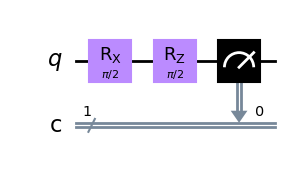

In [3]:
stern_gerlach.draw('mpl', style='clifford', scale = 1)

In [23]:
# Using simulator backend
backend =AerSimulator()

# make quantum circuit compatible to the backend
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
qc_isa = pm.run(stern_gerlach)

In [24]:
# run and get counts
sampler = Sampler(AerSimulator())
job = sampler.run([qc_isa], shots=1000)
results = job.result()

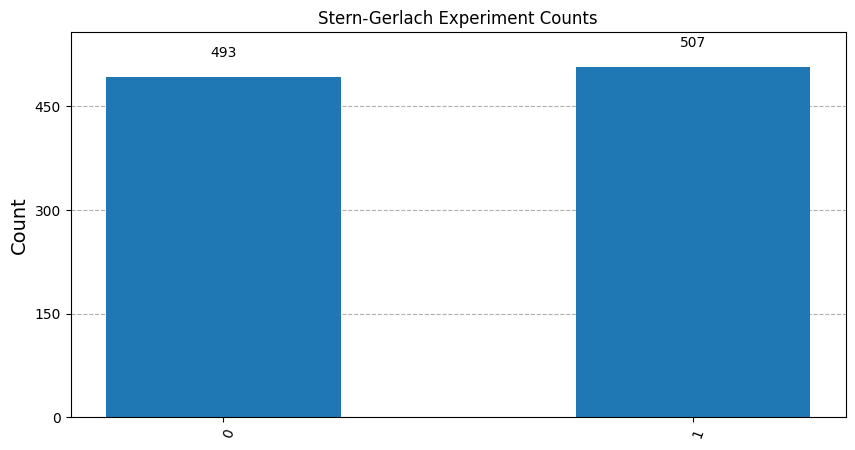

In [25]:
plot_histogram(results[0].data.c.get_counts(), figsize=(10, 5), title='Stern-Gerlach Experiment Counts')

Here, in the above result, it is clear that, the states on the detector side is either spin up or spin down there is no intermediate state in any case. We repeated the whole experiment for 1000 times (shots = 1000), and we got 493 times spin up and 507 times spin up, so the empirical probabilities of getting the spin up or spin down state is ~0.5 for each. Which is consistent with the following quantum state:
$\begin{equation}
    \ket{\psi} = \frac{1}{\sqrt{2}} \ket{spin \ up} + \frac{1}{\sqrt{2}} \ket{spin \ down}
\end{equation}$ 

$\begin{equation}
    \text{or}
\end{equation}$ 

$\begin{equation}
    \ket{\psi} = \frac{1}{\sqrt{2}} \ket{+z} + \frac{1}{\sqrt{2}} \ket{-z}
\end{equation}$ 

which returns probability of spin up = probability of spin down = 0.5

# Stern Gerlach Experiment - II

Here, in this experiment, we apply two detectors of spins both in $\textit{z}$-direction. The first stern gerlach apparatus aligning in the $\textit{z}$-direction splits into two states and then we will pass it through another stern gerlach apparatus aligning in the $\textit{z}$-direction which will check the spin states again.

In [28]:
stern_gerlach_1 = QuantumCircuit(1, 2)
stern_gerlach_1.h(0)
stern_gerlach_1.measure(0, 0)
stern_gerlach_1.barrier()
stern_gerlach_1.measure(0, 1)

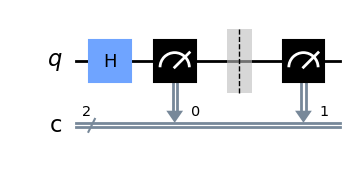

In [29]:
stern_gerlach_1.draw('mpl', style='clifford', scale = 1)

In [30]:
qc_isa_1 =  pm.run(stern_gerlach_1)

In [31]:
sampler = Sampler(AerSimulator())
job_1 = sampler.run([qc_isa_1], shots=1000)
results_1 = job_1.result()

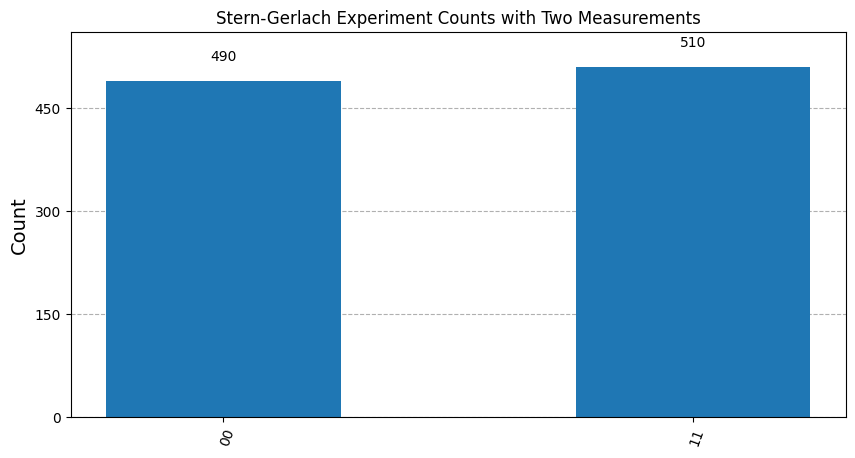

In [11]:
plot_histogram(results_1[0].data.c.get_counts(), figsize=(10, 5), title='Stern-Gerlach Experiment Counts with Two Measurements')

The above results, demonstrate that if a state is measured in $\textit{spin \ up}$ in  the first apparatus will remain in the same state in the second apparatus as well. Similarly for the $\textit{spin \ down}$ state as well. The histogram results $00$ and $11$ demonstrates this fact, as there is no $01$ or $10$ states.

# Stern Gerlach Experiment - III

In this experiment, we will apply two stern gerlach apparatus one aligning in the $\textit{z}$-direction and next aligning in the $\textit{x}$-direction. We'll check whether it retains the information of the previously measured state or not in the second apparatus. 

In [33]:
stern_gerlach_2 = QuantumCircuit(1, 1)
stern_gerlach_2.h(0)
stern_gerlach_2.barrier()
stern_gerlach_2.measure(0, 0)
stern_gerlach_2.h(0)
stern_gerlach_2.barrier()
stern_gerlach_2.measure(0, 0)

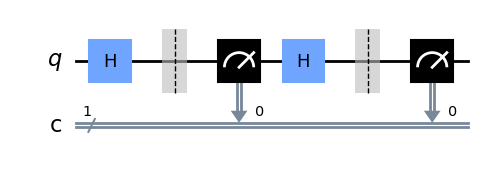

In [34]:
stern_gerlach_2.draw('mpl', style='clifford', scale = 1)

In [35]:
qc_isa_2 = pm.run(stern_gerlach_2)

In [36]:
job_2 = sampler.run([qc_isa_2], shots=1000)
results_2 = job_2.result()

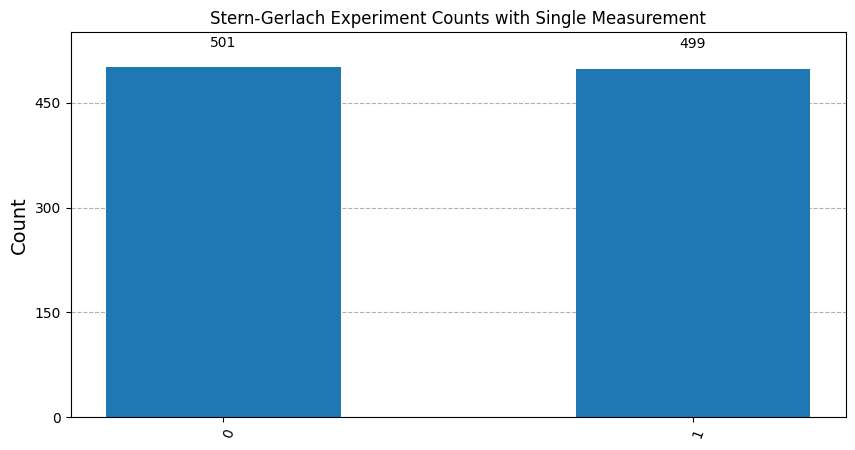

In [37]:
plot_histogram(results_2[0].data.c.get_counts(), figsize=(10,5), title='Stern-Gerlach Experiment Counts with Single Measurement')

The above results, shows that the results of the measurement of the first apparatus is not retained the second state. 